In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
class Optimization:
    def __init__(self,Max_iter=500,eps_tol=1e-8,learning_rate = 0.02):
        self.Max_iter = Max_iter 
        self.eps_tol = eps_tol
        self.learning_rate = learning_rate
        print('The Max_iter is :',Max_iter,'\n',
              'The eps_tol is :',eps_tol)
        print('************************')
        
    # 传统梯度下降
    def gradient(self,init_x,obj_f,grad_f):
        print('您正在使用传统梯度下降算法')
        iter_x = init_x
        obj_curr = obj_f(iter_x)
        # 记录位置与函数值
        local = iter_x
        values = [obj_curr]
        
        for iter_num in range(self.Max_iter):
            # compute the gradient 
            grad_iter = grad_f(iter_x)
            # compute the direction
            desc_dir = -1*grad_iter
            # compute the learning_rate（‘学习率’）
            learning_rate = self.learning_rate
            # next point
            x_last = iter_x
            iter_x = iter_x+learning_rate*desc_dir
            # the obj_fun of new point
            obj_last = obj_curr
            obj_curr = obj_f(iter_x)
            
            local = np.hstack([local,iter_x])
            values.append(obj_curr)
            
            if np.abs(obj_last-obj_curr) <= self.eps_tol:
                break
        print('the number of iterations is:',iter_num,'\n',
              'the end point is:','\n',iter_x)
        return local,values,values[-1]

In [80]:
def obj_func(x:np.mat):
    n = len(x)
    t = np.arange(1,n + 1)*0.1
    y = np.exp(-t) - 5*np.exp((-10)*t) + 3*np.exp((-4)*t)
    t_vect = np.mat(t).T
    y_vect = np.mat(y).T
    
    r_vect = np.zeros(x.shape)
    for i in range(n):#6
        r_vect[i] = x[2]*np.exp((-1)*t_vect[i]*x[0]) - x[3]*np.exp((-1)*t_vect[i]*x[1]) + x[5]*np.exp((-1)*t_vect[i]*x[4]) - y_vect[i]
        
    obj_val = float(sum(np.power(r_vect,2)))
    return obj_val

def grad_func(x:np.mat):
    n = len(x)
    t = np.arange(1,n + 1)*0.1
    y = np.exp(-t) - 5*np.exp((-10)*t) + 3*np.exp((-4)*t)
    t_vect = np.mat(t).T
    y_vect = np.mat(y).T
    
    r_mat = np.zeros((n,n))
    r_vect = np.zeros(x.shape)
    for i in range(n):
        r_vect[i] = x[2]*np.exp((-1)*t_vect[i]*x[0]) - x[3]*np.exp((-1)*t_vect[i]*x[1]) + x[5]*np.exp((-1)*t_vect[i]*x[4]) - y_vect[i]
        r_mat[i][0] = 2*r_vect[i]*((-1)*t_vect[i]*x[2]*np.exp((-1)*t_vect[i]*x[0]))
        r_mat[i][1] = 2*r_vect[i]*((-1)*t_vect[i]*x[3]*np.exp((-1)*t_vect[i]*x[1]))
        r_mat[i][2] = 2*r_vect[i]*np.exp((-1)*t_vect[i]*x[0])
        r_mat[i][3] = 2*r_vect[i]*(-1)*(np.exp((-1)*t_vect[1]*x[0]))
        r_mat[i][4] = 2*r_vect[i]*((-1)*t_vect[i]*x[5]*np.exp((-1)*t_vect[i]*x[4]))
        r_mat[i][5] = 2*r_vect[i]*np.exp((-1)*t_vect[i]*x[4])

    grad_vect = np.mat(np.sum(r_mat,axis=0)).T#按列求和
    return grad_vect

The Max_iter is : 500 
 The eps_tol is : 1e-08
************************
您正在使用传统梯度下降算法
the number of iterations is: 166 
 the end point is: 
 [[1.00520121]
 [1.92916517]
 [1.16340806]
 [0.93736501]
 [1.00520121]
 [1.16340806]]
5.0765272765262496e-06


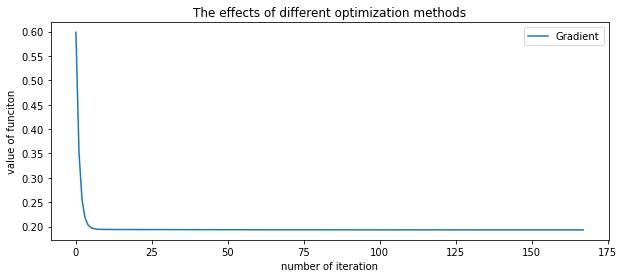

In [85]:
x_init = np.mat([1,2,1,1,1,1]).T
best_x = np.mat([52.36174141,1.96594411,42.67111508,-2.62854716,15.24979306,-6.01988519]).T 

# print(x_init[4])
Opt = Optimization()
local,f,f_x = Opt.gradient(x_init,obj_func,grad_func)
# print(f_x)
print(obj_func(best_x))
x = np.squeeze(np.array(local[0,:]))
y = np.squeeze(np.array(local[1,:]))

fig = plt.figure(figsize=(10,4))
plt.title('The effects of different optimization methods')
plt.plot(list(range(len(f))),f,label='Gradient')
plt.xlabel('number of iteration')
plt.ylabel('value of funciton')
plt.legend()
plt.show()